### Zillow Median List Price Year-on-year change

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# make display wider
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:88% !important; }</style>"))

In [3]:
geo = gpd.read_file('data/shapefiles/nycmetro_county.geojson')
#geo.head()

In [4]:
df = pd.read_csv('data/Zil_MedPriceYoY.csv')

In [5]:
dates = df.columns.tolist()[2:]

In [6]:
dff = pd.melt(df,id_vars=['geoid','geolbl'],value_vars =dates)

In [7]:
counties = pd.merge(geo,dff,left_on='GEOID_Num',right_on='geoid')

In [8]:
counties = counties.drop(columns=['COUNTYFP', 'AFFGEOID', 'GEOID', 'NAME',\
                                  'ALAND', 'AWATER', 'ATOTAL', 'ATOTAL_mi', 'ALAND_mi',\
                                  'GEOID_Num'])
#counties.head()

In [9]:
#counties.describe()

In [10]:
months = counties.variable.unique().tolist()

In [16]:
def monthly_maps(gdf,month):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    divnorm = mpl.colors.TwoSlopeNorm(vmin= -0.2, vcenter = 0,vmax = 0.35) # within a 95% accuracy one way or other
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=divnorm)
    sm.set_array([])
    gdf.plot(column = 'value', cmap = 'RdBu', edgecolor="face", norm = divnorm, linewidth=0.4, ax = ax)
    fig.colorbar(sm)
    ax.set_title(f'Y-o-Y % Change in Median List {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
   #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/Co_Price/{month}.jpg', dpi = 400) # saving each scatter plot by month

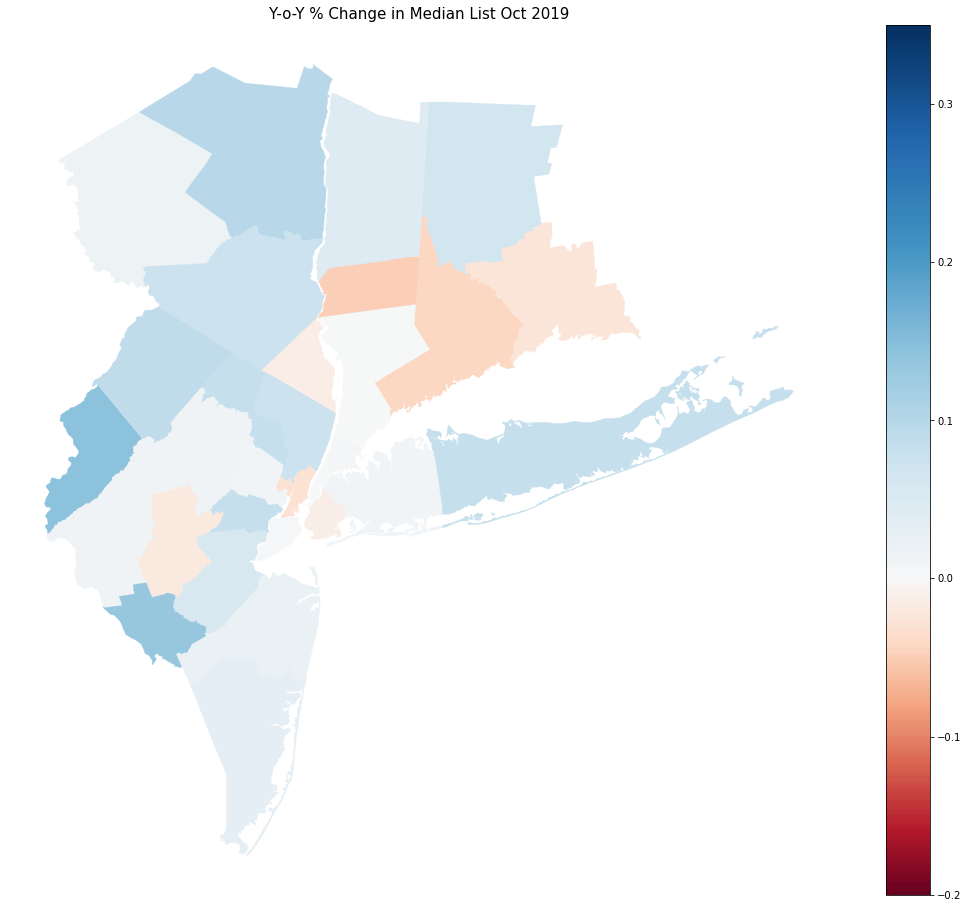

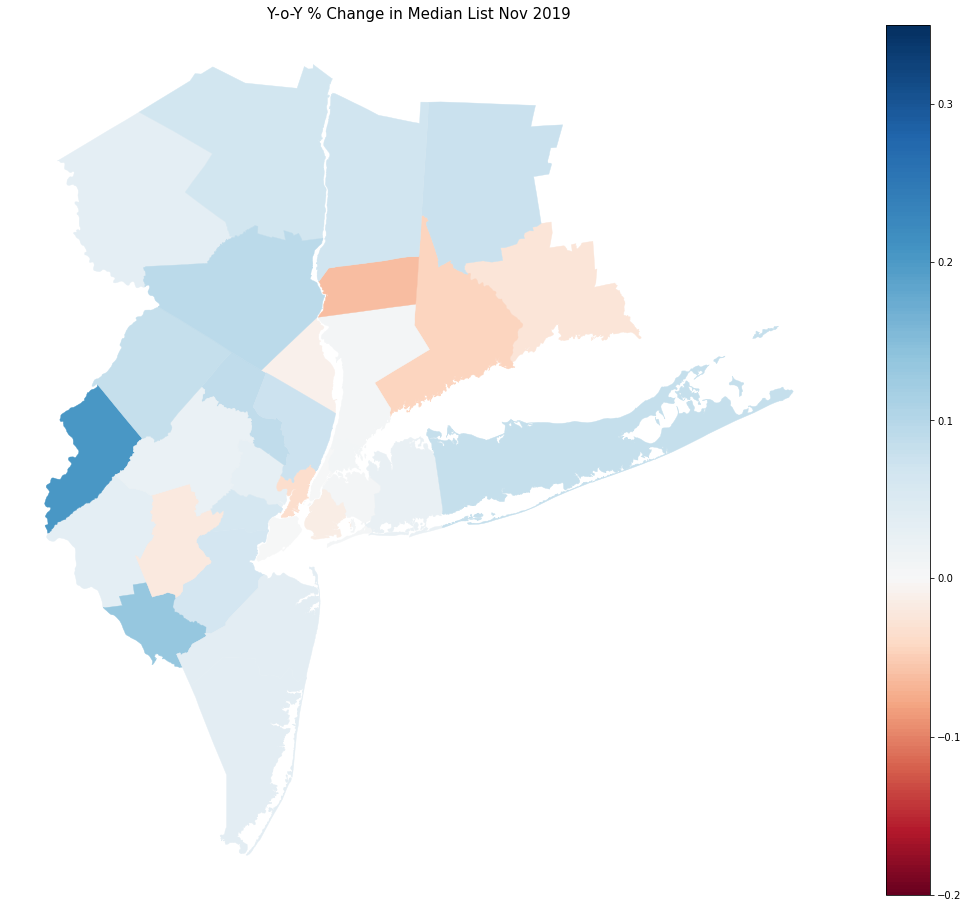

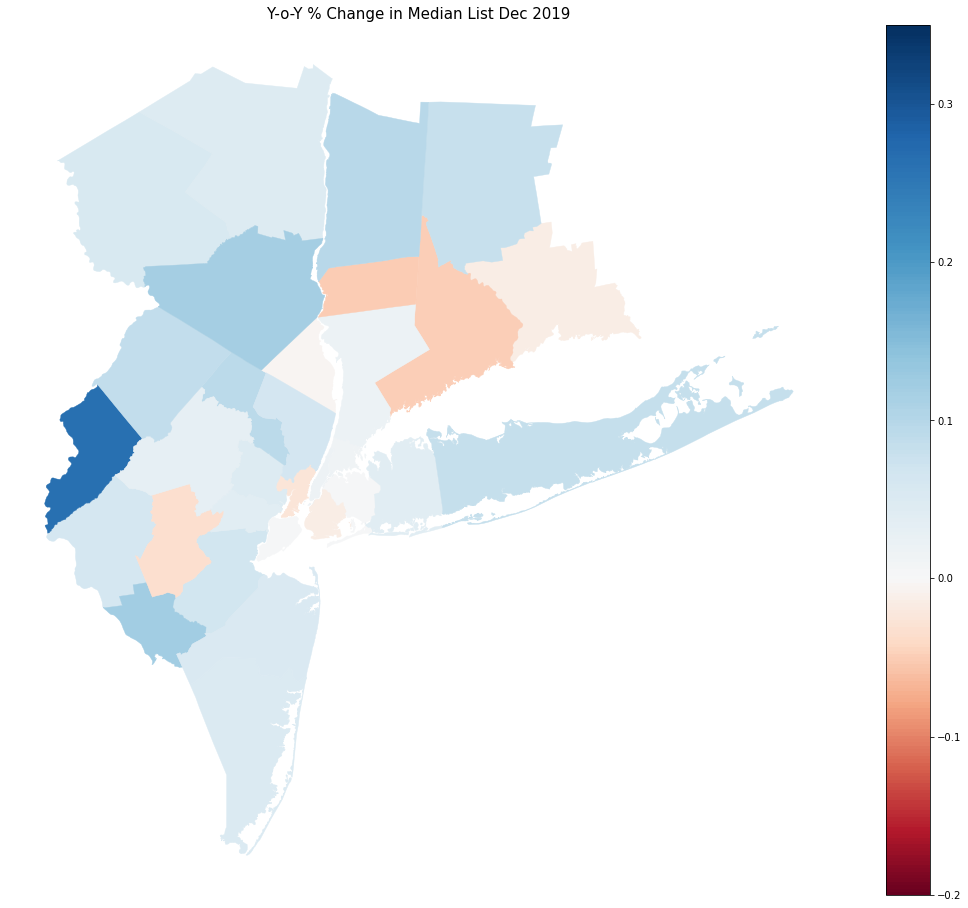

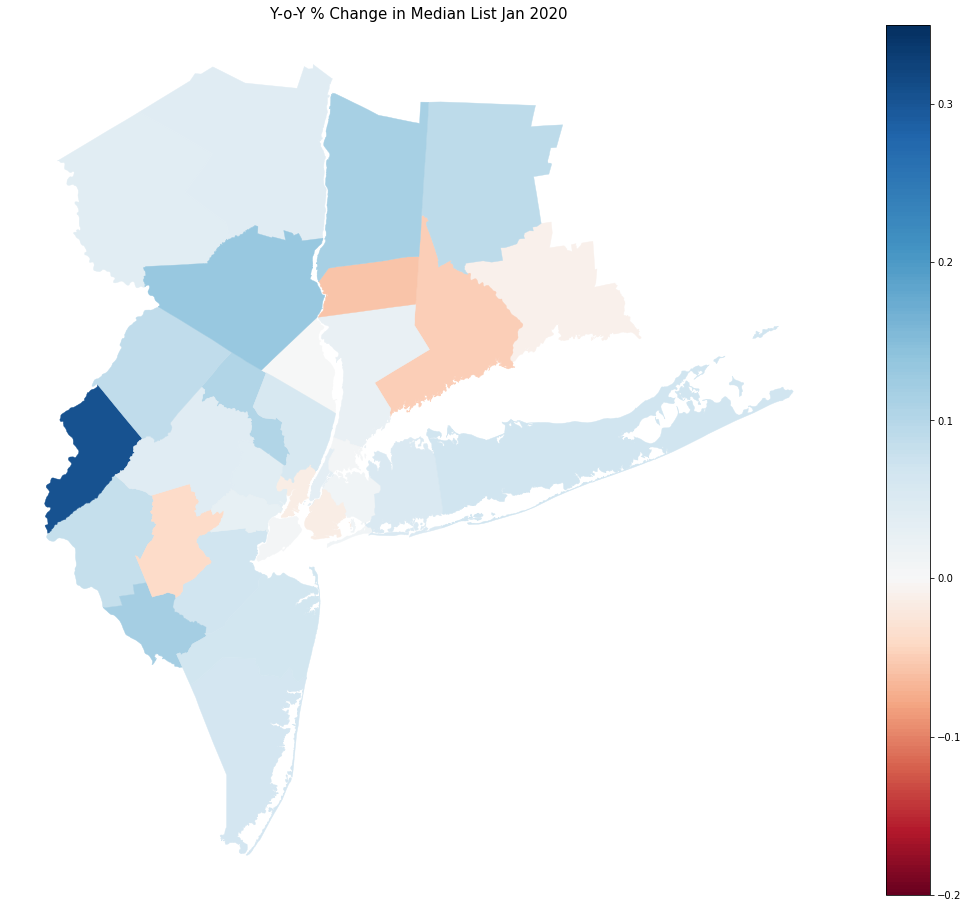

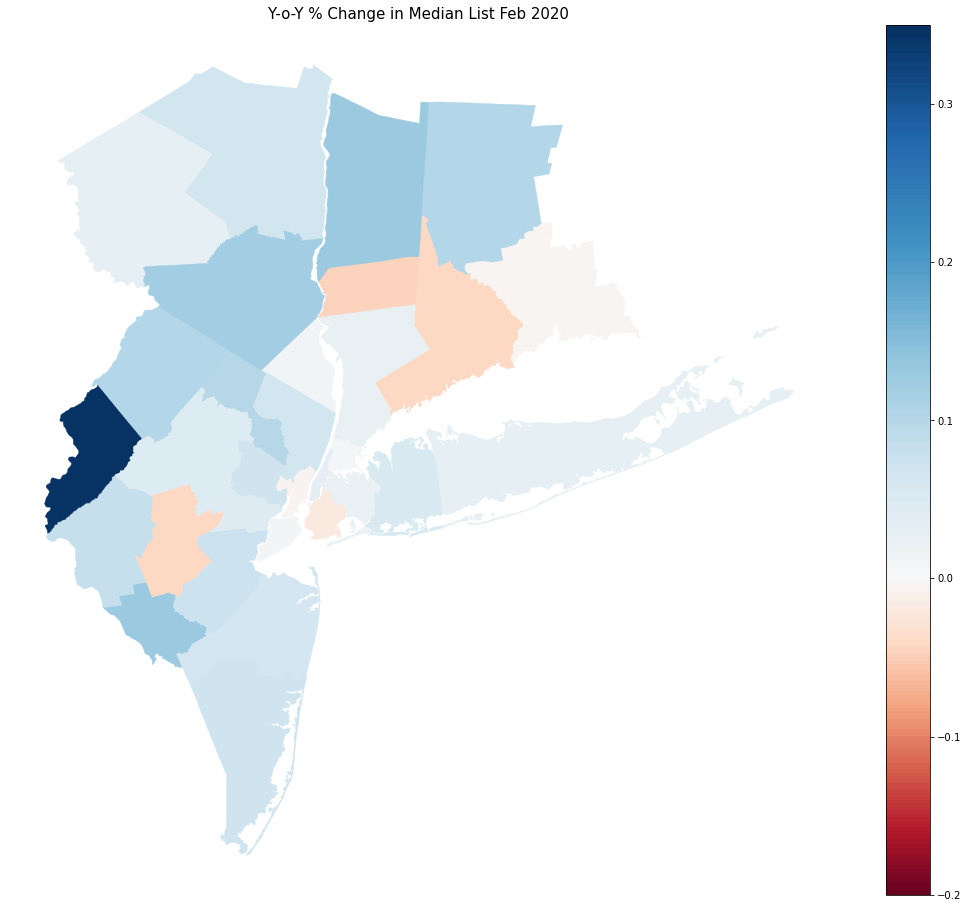

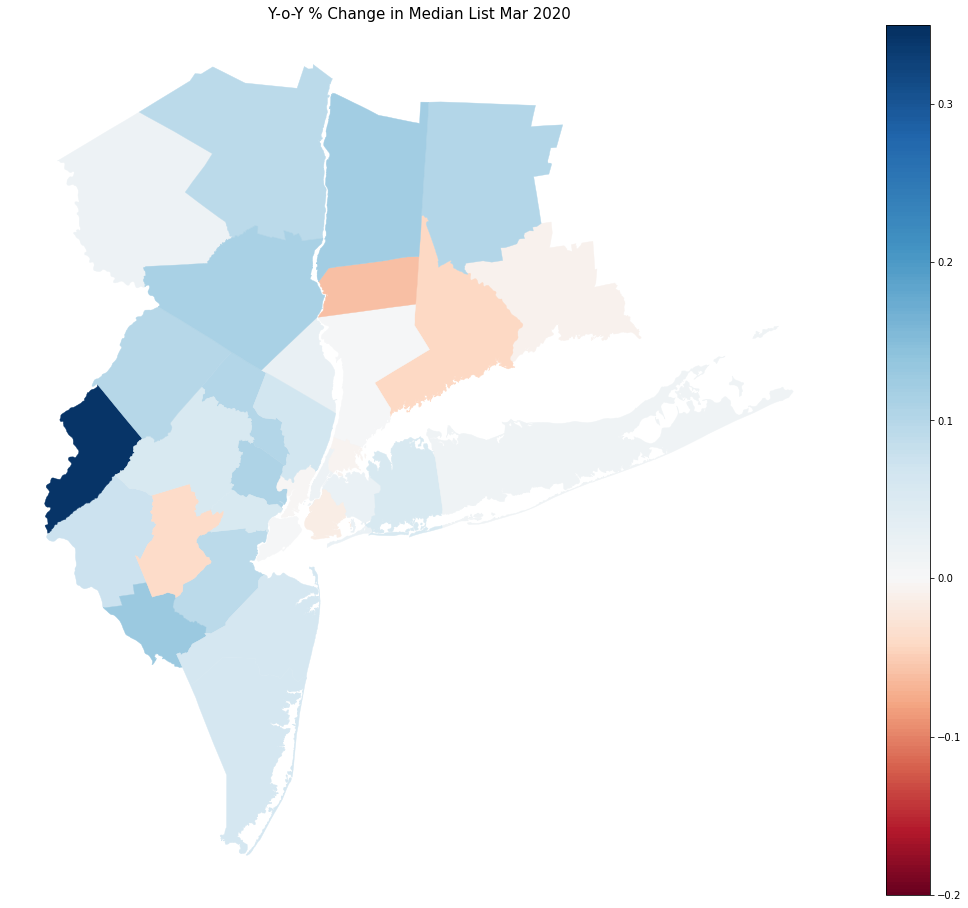

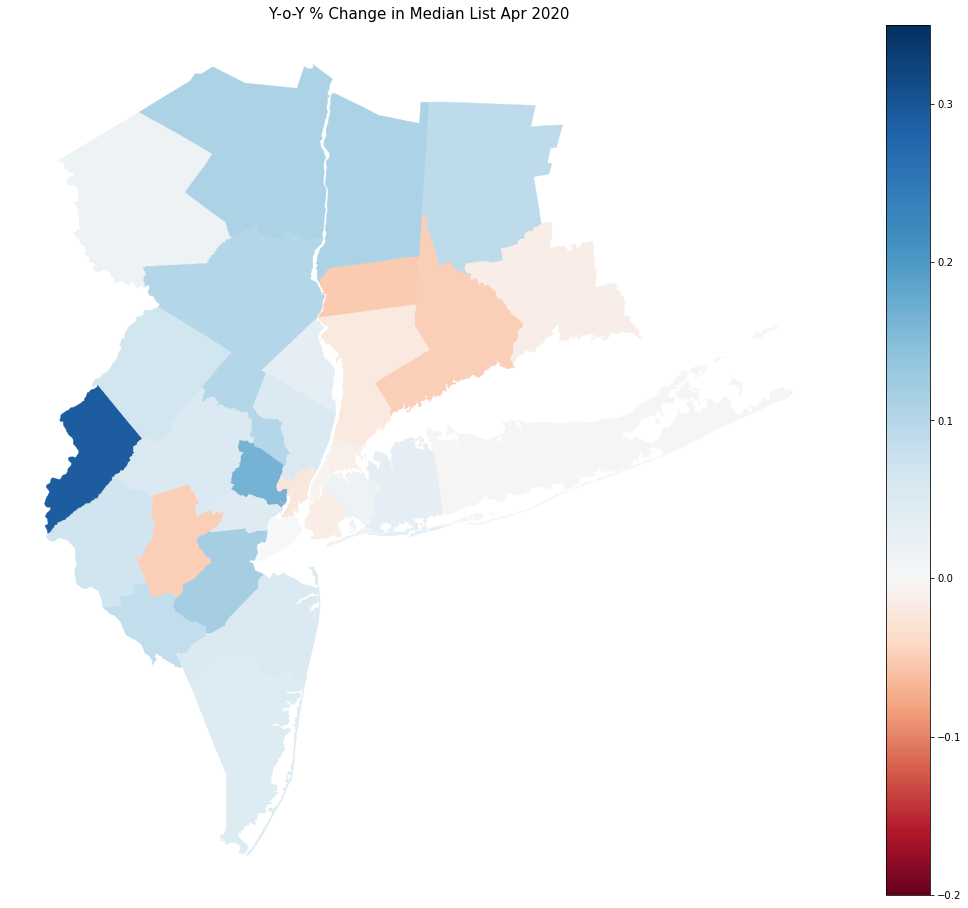

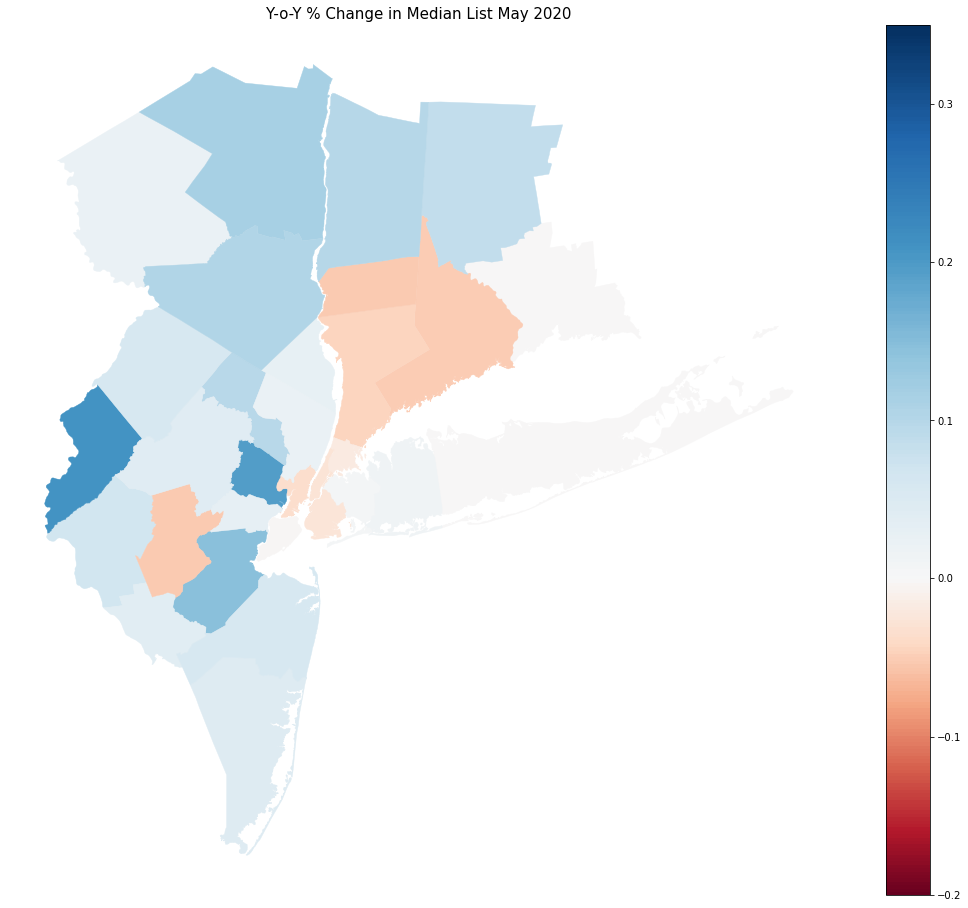

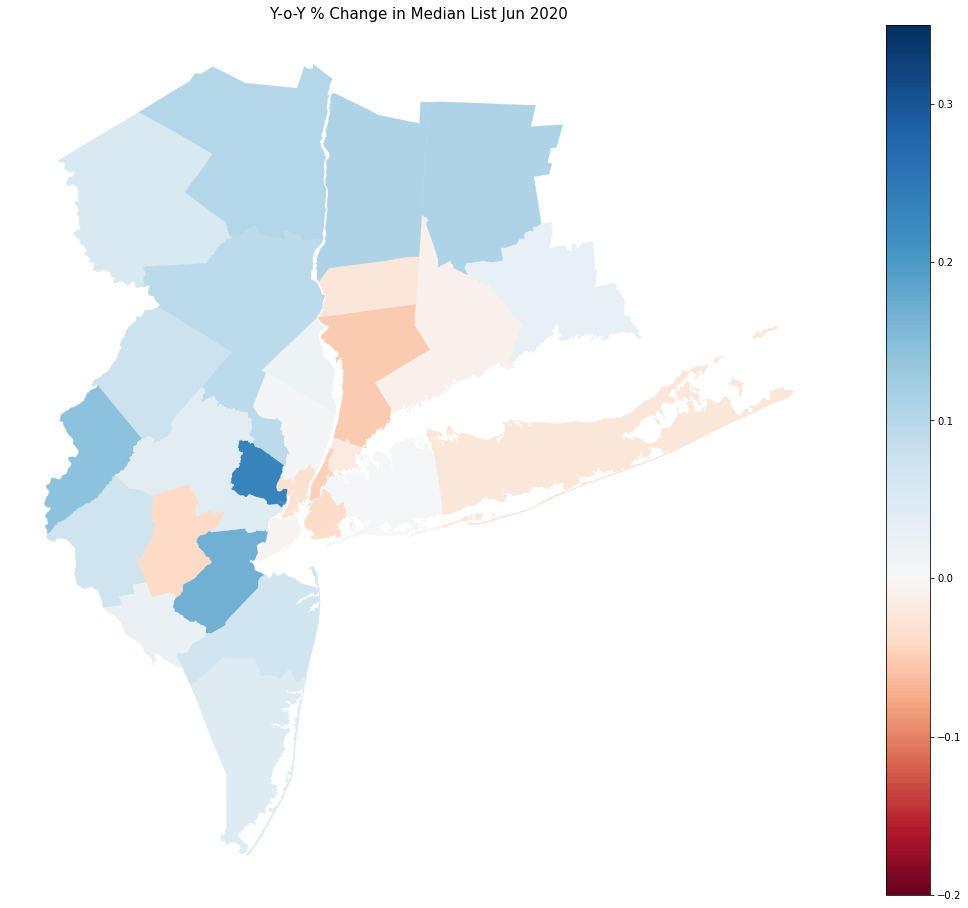

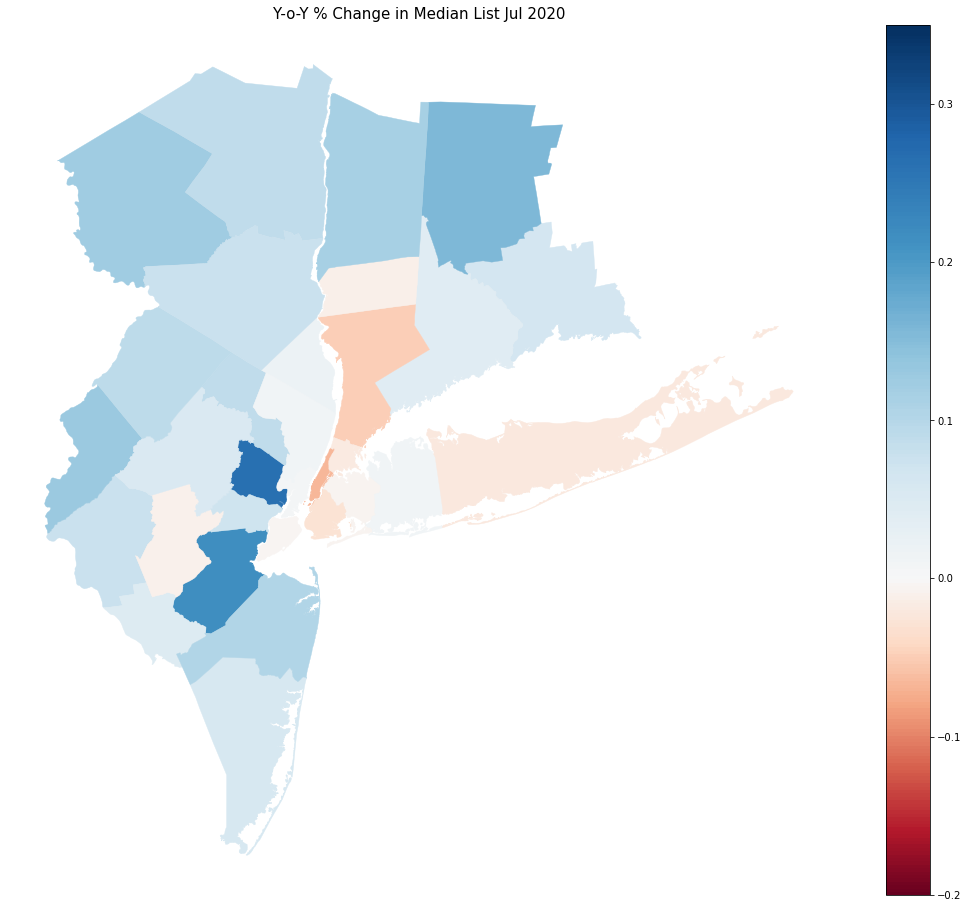

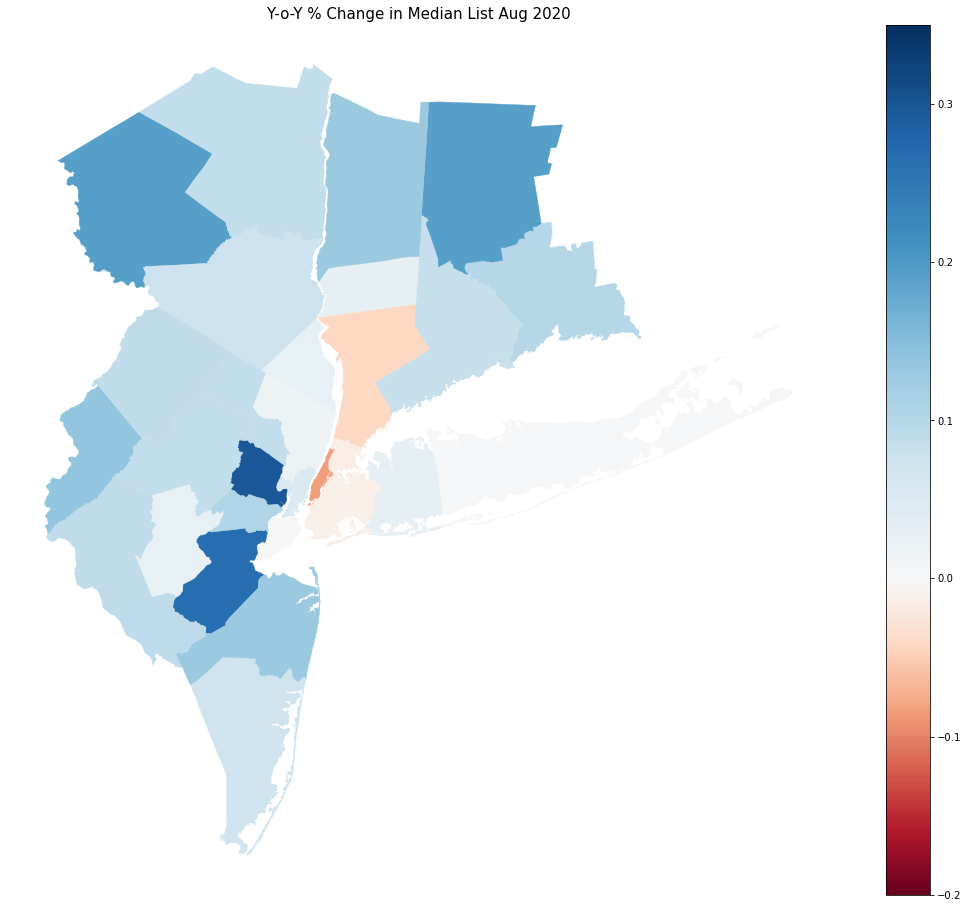

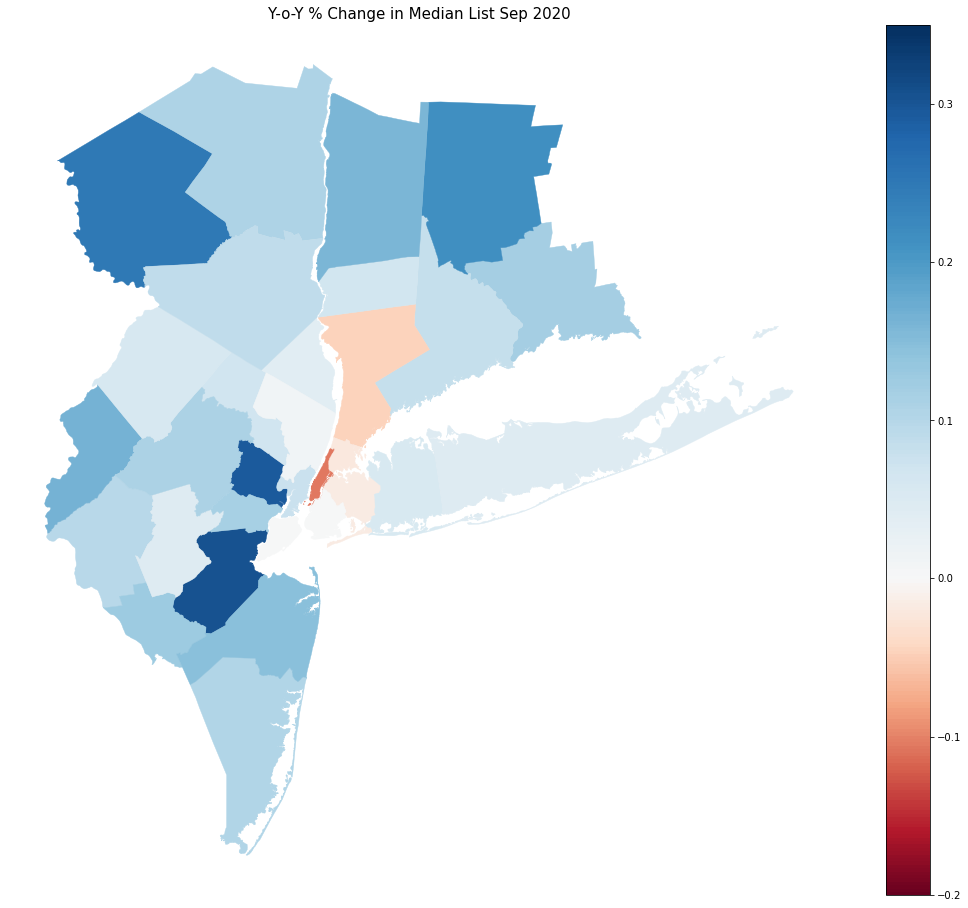

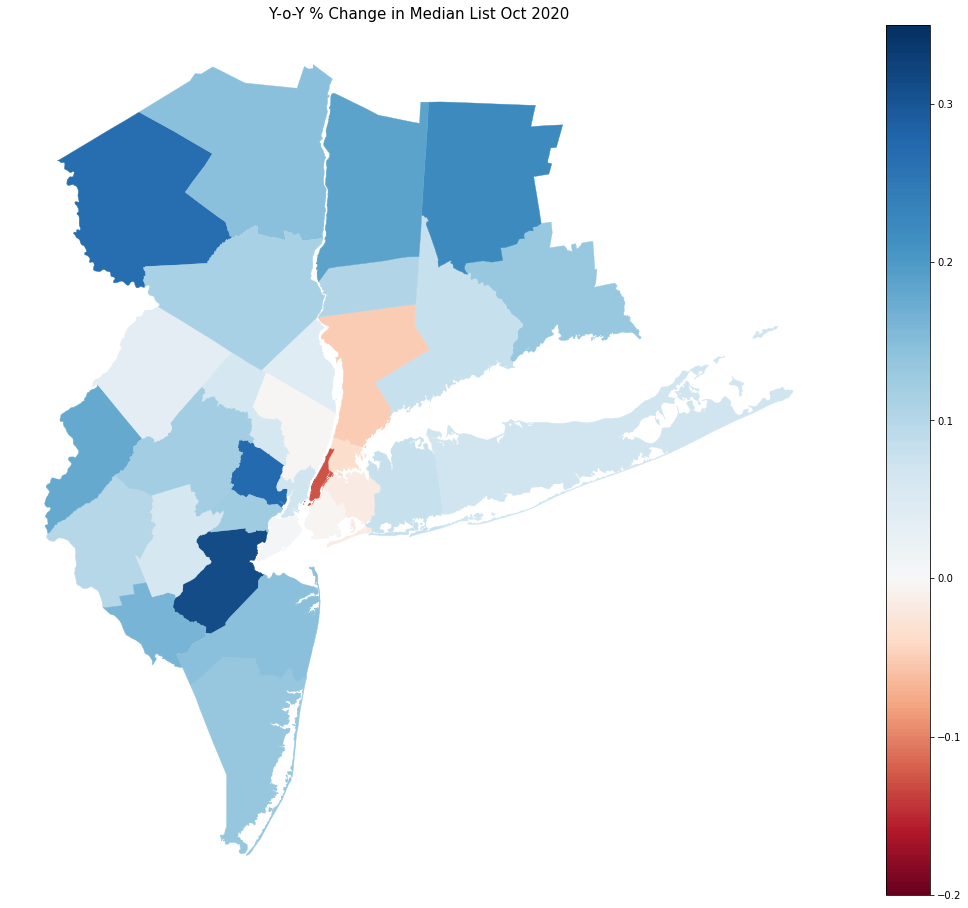

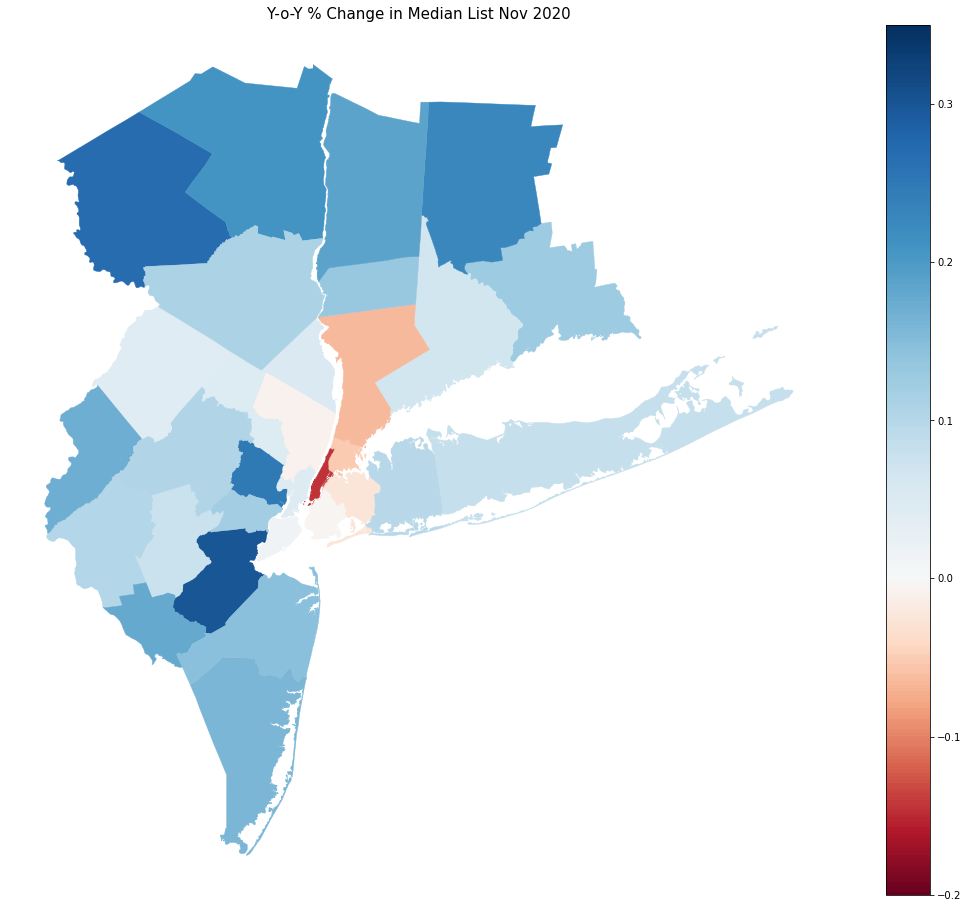

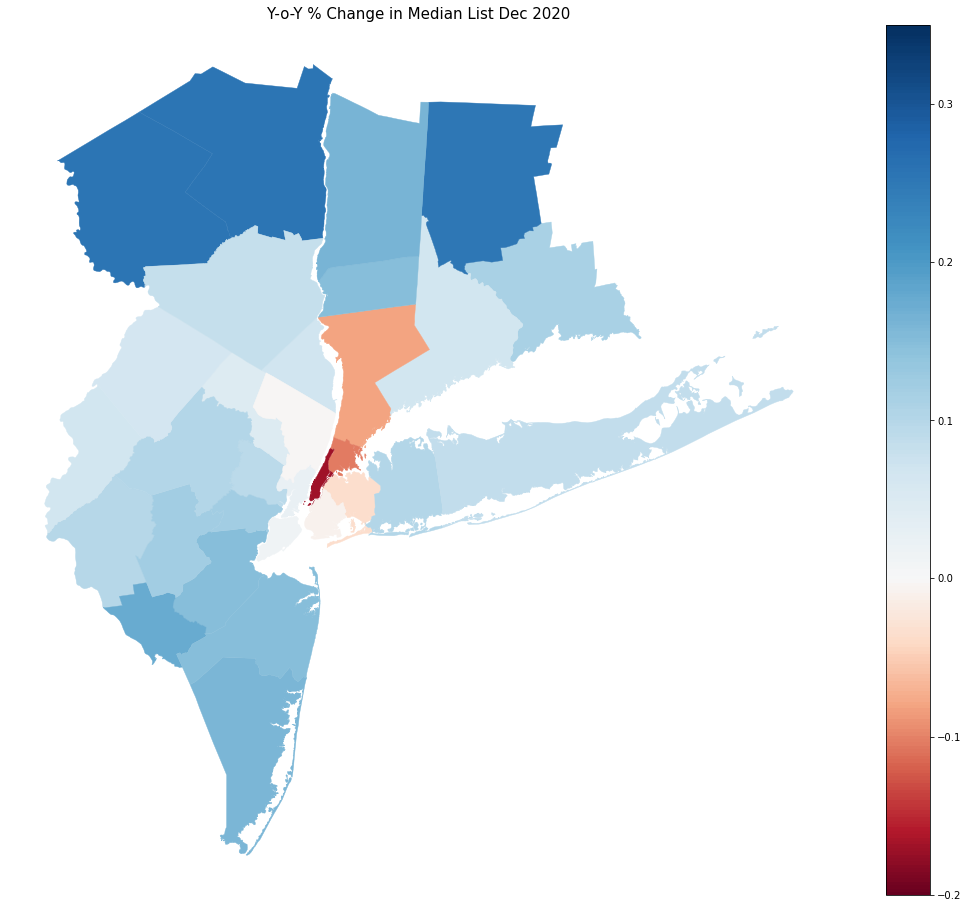

In [17]:
for m in months:
    gdf = counties[counties['variable'].isin([m])]
    monthly_maps(gdf,m)